In this notebook, I am using 5c to do snotel Vs UAVSAR comparison for other sites at BoiseRiver (Bogus, Banner Summit, Jackson Peak)

In [1]:
#import packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#print working directory
print(os.getcwd())

/home/naheemadebisi/snow-analytics/lowman/notebooks


In [3]:
#read the cvs file
Bogus_snotel_SD = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/Bogus_978_25_WATERYEAR=2021.csv', 
                            skiprows=3, index_col= ['Date'], usecols= ['Date', 'SNWD.I-1 (in) '], na_values = -99.9)

Banner_snotel_SD = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/Banner_312_25_WATERYEAR=2021.csv', 
                            skiprows=3, index_col= ['Date'], usecols= ['Date', 'SNWD.I-1 (in) '], na_values = -99.9)
MCS_snotel_SD = pd.read_csv('/SNOWDATA/Nah/lowman/Snotel/MCS_637_25_WATERYEAR=2021.csv', 
                            skiprows=3, index_col= ['Date'], usecols= ['Date', 'SNWD.I-1 (in) '], na_values = -99.9)


In [4]:
#Set to datetime format
Banner_snotel_SD.index = pd.to_datetime(Banner_snotel_SD.index)
Bogus_snotel_SD.index = pd.to_datetime(Bogus_snotel_SD.index)
MCS_snotel_SD.index = pd.to_datetime(MCS_snotel_SD.index)

In [5]:
#change the unit of the SD values to centimeter
Banner_snotel_SD['Banner_SD (cm)'] = Banner_snotel_SD['SNWD.I-1 (in) '] * 2.54
Bogus_snotel_SD['Bogus_SD (cm)'] = Bogus_snotel_SD['SNWD.I-1 (in) '] * 2.54
MCS_snotel_SD['MCS_SD (cm)'] = MCS_snotel_SD['SNWD.I-1 (in) '] * 2.54

In [6]:
#subset to the date range of the UAVSAR data
Banner_snotel_SD = Banner_snotel_SD.loc['2021-01-01':'2021-04-30']
Bogus_snotel_SD = Bogus_snotel_SD.loc['2021-01-01':'2021-04-30']
MCS_snotel_SD = MCS_snotel_SD.loc['2021-01-01':'2021-04-30']

In [7]:
#create a column of difference between current and previous snow depth
Banner_snotel_SD['Banner_SD_diff'] = Banner_snotel_SD['Banner_SD (cm)'].diff()
Bogus_snotel_SD['Bogus_SD_diff'] = Bogus_snotel_SD['Bogus_SD (cm)'].diff()
MCS_snotel_SD['MCS_SD_diff'] = MCS_snotel_SD['MCS_SD (cm)'].diff()

In [8]:
Banner_snotel_SD

,SNWD.I-1 (in),Banner_SD (cm),Banner_SD_diff
Date,,,
2021-01-01,39.0,99.06,NaN
2021-01-02,39.0,99.06,0.00
2021-01-03,40.0,101.60,2.54
2021-01-04,44.0,111.76,10.16
2021-01-05,54.0,137.16,25.40
...,...,...,...
2021-04-26,36.0,91.44,5.08
2021-04-27,34.0,86.36,-5.08
2021-04-28,32.0,81.28,-5.08


In [9]:
Bogus_snotel_SD

,SNWD.I-1 (in),Bogus_SD (cm),Bogus_SD_diff
Date,,,
2021-01-01,40.0,101.60,NaN
2021-01-02,39.0,99.06,-2.54
2021-01-03,40.0,101.60,2.54
2021-01-04,45.0,114.30,12.70
2021-01-05,52.0,132.08,17.78
...,...,...,...
2021-04-26,26.0,66.04,5.08
2021-04-27,26.0,66.04,0.00
2021-04-28,26.0,66.04,0.00


In [10]:
MCS_snotel_SD

,SNWD.I-1 (in),MCS_SD (cm),MCS_SD_diff
Date,,,
2021-01-01,46.0,116.84,NaN
2021-01-02,44.0,111.76,-5.08
2021-01-03,45.0,114.30,2.54
2021-01-04,54.0,137.16,22.86
2021-01-05,58.0,147.32,10.16
...,...,...,...
2021-04-26,31.0,78.74,7.62
2021-04-27,30.0,76.20,-2.54
2021-04-28,29.0,73.66,-2.54


In [25]:
#Concat the snotel dataframes
snotel_data = pd.concat([Banner_snotel_SD, Bogus_snotel_SD, MCS_snotel_SD], axis=1).drop('SNWD.I-1 (in) ', axis=1)
snotel_data.head()

,Banner_SD (cm),Banner_SD_diff,Bogus_SD (cm),Bogus_SD_diff,MCS_SD (cm),MCS_SD_diff
Date,,,,,,
2021-01-01,99.06,NaN,101.60,NaN,116.84,NaN
2021-01-02,99.06,0.00,99.06,-2.54,111.76,-5.08
2021-01-03,101.60,2.54,101.60,2.54,114.30,2.54
2021-01-04,111.76,10.16,114.30,12.70,137.16,22.86
2021-01-05,137.16,25.40,132.08,17.78,147.32,10.16


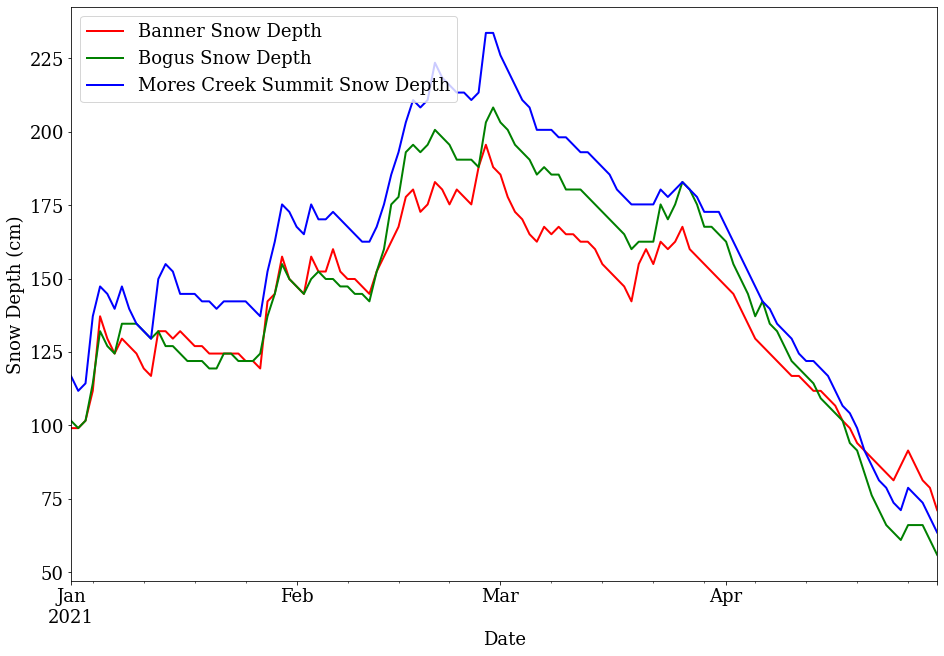

In [26]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

snotel_data.plot(ax=ax, y='Banner_SD (cm)', color='red', linewidth=2, label='Banner Snow Depth')
snotel_data.plot(ax=ax, y='Bogus_SD (cm)', color='green', linewidth=2, label='Bogus Snow Depth')
snotel_data.plot(ax=ax, y='MCS_SD (cm)', color='blue', linewidth=2, label='Mores Creek Summit Snow Depth')

ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')


plt.show()

# #save the figure
# fig.savefig('Monthly_Mean_SWE.jpeg', dpi=500)

In [12]:
#find the snow depth at the beginning of uavsar time series; The interferogram starts at 01-15-2021; let's take the snotel depth at the date as the base value
Banner_snotel_SD_Base = Banner_snotel_SD.loc['2021-01-15']
Bogus_snotel_SD_Base = Bogus_snotel_SD.loc['2021-01-15']
MCS_snotel_SD_Base = MCS_snotel_SD.loc['2021-01-15']


In [13]:
#print the base snow depth
print(Banner_snotel_SD_Base['Banner_SD (cm)'], Bogus_snotel_SD_Base['Bogus_SD (cm)'], MCS_snotel_SD_Base['MCS_SD (cm)'])

129.54 127.0 152.4


In [14]:
#Create a dataframe of start and end dates for each interferograms

int_dates = [[1, '01-01-2021', '01-15-2021', 129.54, 127.0, 152.4],
            [2, '01-15-2021', '01-20-2021', -6.169, 1.667, -3.383], 
            [3, '01-20-2021', '01-27-2021', 1.515, -3.325, 1.687], 
            [4, '01-27-2021', '02-03-2021', 12.080, np.nan, np.nan],
            [5, '02-03-2021', '02-10-2021', 10.248, 10.393, 2.608],
            [6, '02-10-2021', '03-03-2021', np.nan, np.nan, np.nan], 
            [7, '03-03-2021', '03-10-2021', 4.536,2.094, 1.915],
            [8, '03-10-2021', '03-16-2021', 3.134, 1.067,4.334], 
            [9, '03-16-2021', '03-22-2021', np.nan, -0.296, -6.845]]

uavsar_SD_df = pd.DataFrame(int_dates, columns= ['inteferograms', 'start_date', 'end_date', 'SnowDepth_Banner', 'SnowDepth_Bogus', 'SnowDepth_MCS']).set_index('end_date')

#uavsar_SD_df

In [15]:
uavsar_SD_df

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS
end_date,,,,,
01-15-2021,1,01-01-2021,129.540,127.000,152.400
01-20-2021,2,01-15-2021,-6.169,1.667,-3.383
01-27-2021,3,01-20-2021,1.515,-3.325,1.687
02-03-2021,4,01-27-2021,12.080,NaN,NaN
02-10-2021,5,02-03-2021,10.248,10.393,2.608
03-03-2021,6,02-10-2021,NaN,NaN,NaN
03-10-2021,7,03-03-2021,4.536,2.094,1.915
03-16-2021,8,03-10-2021,3.134,1.067,4.334
03-22-2021,9,03-16-2021,NaN,-0.296,-6.845


In [16]:
#set the index to datetime format
uavsar_SD_df.index = pd.to_datetime(uavsar_SD_df.index)

#create a cum sum of snow depth
uavsar_SD_df['SnowDepth_Banner_cumsum'] = uavsar_SD_df['SnowDepth_Banner'].cumsum()
uavsar_SD_df['SnowDepth_Bogus_cumsum'] = uavsar_SD_df['SnowDepth_Bogus'].cumsum()
uavsar_SD_df['SnowDepth_MCS_cumsum'] = uavsar_SD_df['SnowDepth_MCS'].cumsum()

uavsar_SD_df

,inteferograms,start_date,SnowDepth_Banner,SnowDepth_Bogus,SnowDepth_MCS,SnowDepth_Banner_cumsum,SnowDepth_Bogus_cumsum,SnowDepth_MCS_cumsum
end_date,,,,,,,,
2021-01-15,1,01-01-2021,129.540,127.000,152.400,129.540,127.000,152.400
2021-01-20,2,01-15-2021,-6.169,1.667,-3.383,123.371,128.667,149.017
2021-01-27,3,01-20-2021,1.515,-3.325,1.687,124.886,125.342,150.704
2021-02-03,4,01-27-2021,12.080,NaN,NaN,136.966,NaN,NaN
2021-02-10,5,02-03-2021,10.248,10.393,2.608,147.214,135.735,153.312
2021-03-03,6,02-10-2021,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10,7,03-03-2021,4.536,2.094,1.915,151.750,137.829,155.227
2021-03-16,8,03-10-2021,3.134,1.067,4.334,154.884,138.896,159.561
2021-03-22,9,03-16-2021,NaN,-0.296,-6.845,NaN,138.600,152.716


In [18]:
uavsar_SD_df.columns

Index(['inteferograms', 'start_date', 'SnowDepth_Banner', 'SnowDepth_Bogus',
       'SnowDepth_MCS', 'SnowDepth_Banner_cumsum', 'SnowDepth_Bogus_cumsum',
       'SnowDepth_MCS_cumsum'],
      dtype='object')

You have to interpolate for the snow depth with NAN.

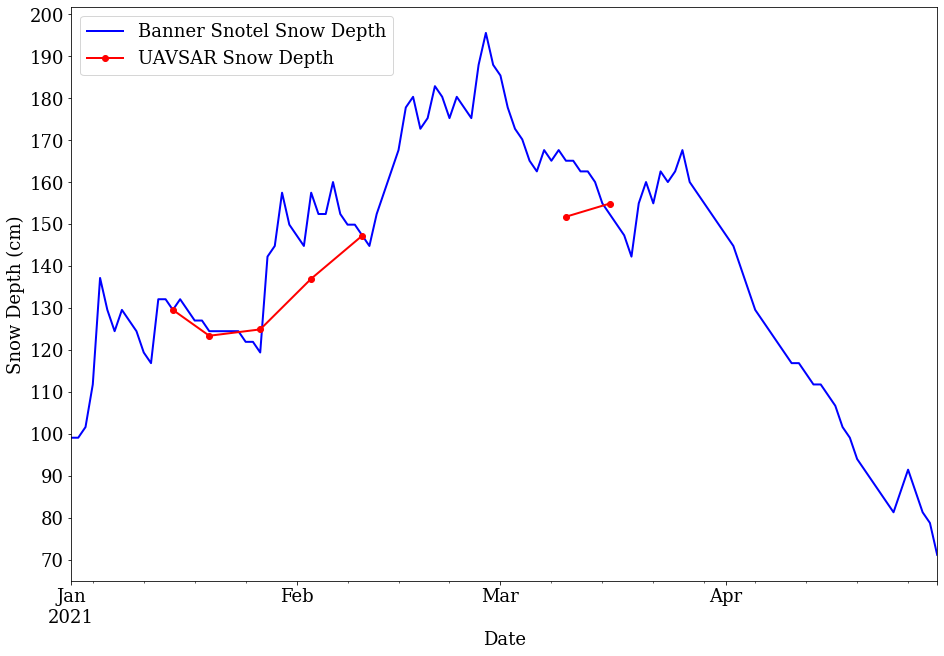

In [27]:
#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

#plot snowtel data and uavsar data
snotel_data.plot(ax=ax, y='Banner_SD (cm)', color='blue', linewidth=2, label='Banner Snotel Snow Depth')
uavsar_SD_df['SnowDepth_Banner_cumsum'].plot(ax=ax, color='red', linewidth=2, label='UAVSAR Snow Depth', marker='o')

#change tick location
# ax.yaxis.set_major_locator(plt.MaxNLocator(13))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))



ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')


plt.show()

# #save the figure
# fig.savefig('UAVSAR-snotel-lidar2.jpeg', dpi=500)

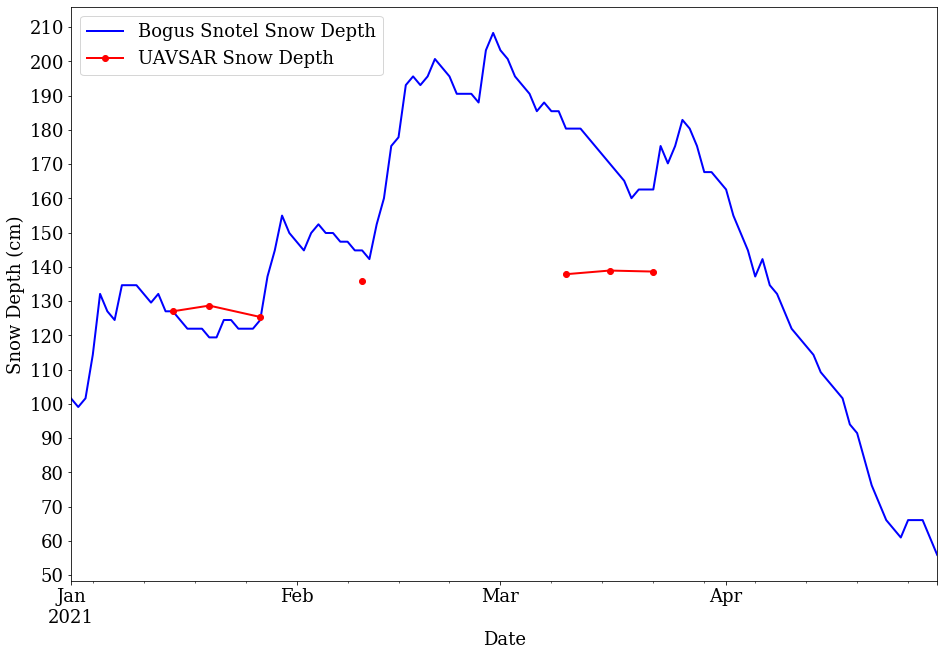

In [30]:
#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

#plot snowtel data and uavsar data
snotel_data.plot(ax=ax, y='Bogus_SD (cm)', color='blue', linewidth=2, label='Bogus Snotel Snow Depth')
uavsar_SD_df['SnowDepth_Bogus_cumsum'].plot(ax=ax, color='red', linewidth=2, label='UAVSAR Snow Depth', marker='o')

#change tick location
# ax.yaxis.set_major_locator(plt.MaxNLocator(13))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))



ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')


plt.show()

# #save the figure
# fig.savefig('UAVSAR-snotel-lidar2.jpeg', dpi=500)

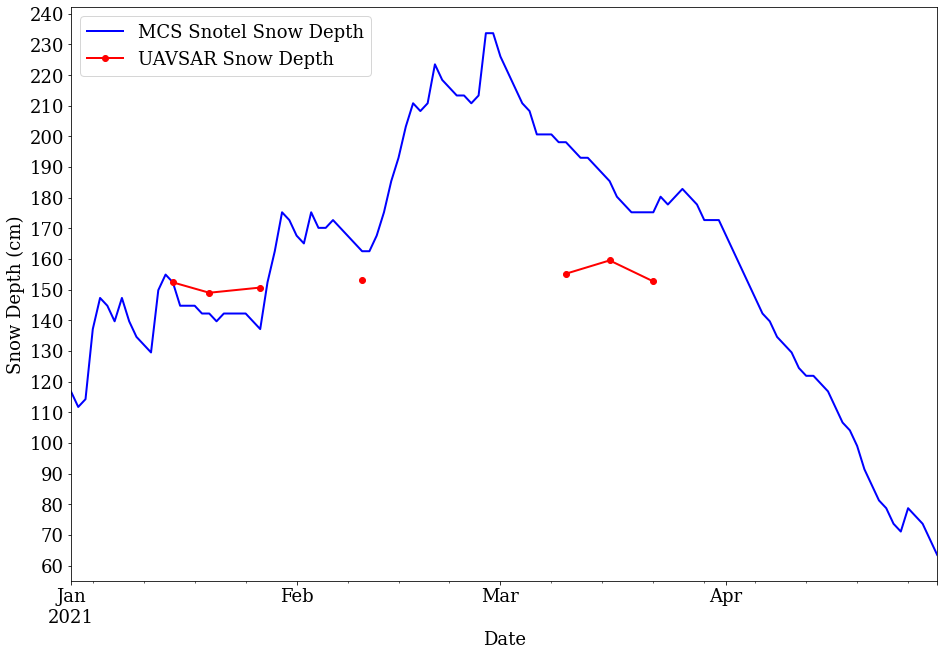

In [31]:
#create a figure and axes elements
fig, ax = plt.subplots(figsize=(13,9), constrained_layout=True)

#plot snowtel data and uavsar data
snotel_data.plot(ax=ax, y='MCS_SD (cm)', color='blue', linewidth=2, label='MCS Snotel Snow Depth')
uavsar_SD_df['SnowDepth_MCS_cumsum'].plot(ax=ax, color='red', linewidth=2, label='UAVSAR Snow Depth', marker='o')

#change tick location
# ax.yaxis.set_major_locator(plt.MaxNLocator(13))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))



ax.set_ylabel('Snow Depth (cm)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')


plt.show()

# #save the figure
# fig.savefig('UAVSAR-snotel-lidar2.jpeg', dpi=500)